Gegeben sei eine Menge von $n$ unterscheidbaren Elementen $e_1, \ldots, e_n$. Aus dieser wird $k$ mal nacheinander zufällig ein Element ausgewählt, dessen Nummer notiert und zufällig zurückgelegt.

Gesucht ist die Wahrscheinlichkeit $P_{n,k}(f)$, sodass unter diesen $k$ Ziehungen mindestens ein Anteil $f\in [0, 1]$ aller $n$ Elemente enthalten ist. Die Reihenfolge der Ziehungsergebnisse spiele keine Rolle.


---

Ziel des Dokuments ist es eine exakte Lösung für $P_{n,k}(f)$ herzuleiten.

---

Die Anzahl aller möglichen Kombinationen (Blatt-Knoten im Baumdiagramm): $N := n^k$


Wahrscheinlichkeit, dass $k$ mal Element $e_1$ gezogen wird: $\frac{1}{N}$

Wahrscheinlichkeit, dass $k$ mal das selbe Element gezogen wird (egal welches): $\qquad p_1 := n\cdot \frac{1}{N}$


Anzahl der Möglichkeiten, dass $k$ mal das selbe Element gezogen wird (egal welches):

$$
N_1 := n
$$

---

Anzahl der Möglichkeiten für $(k-1)$ mal $e_1$ und $1$ mal $e_2$: $\binom{k}{1}=\frac{k!}{(k-1)!\cdot 1!}=k$

($e_2$ kann an $k$ verschiedenen Stellen stehen).

Anzahl der Möglichkeiten für $(k-1)$ mal $e_1$ und $1$ mal $e_j$ (mit $j\neq 1$): $(n-1)k$

Anzahl der Möglichkeiten für $(k-1)$ mal $e_i$ und $1$ mal $e_j$ (mit $j\neq i$):
$N_{2:(k-1),1}:=n\cdot(n-1)\cdot k$

---

In [1]:
%load_ext ipydex.displaytools

In [2]:
# Überprüfung mit Code:

import math
import itertools as it
from collections import defaultdict
from scipy.special import binom
from sympy import factorial, sympify
import numpy as np
import matplotlib.pyplot as plt


n = 6
k = 4
def create_n_elements(n):
     return [f"e{i+1}" for i in range(n)]
    
elements = create_n_elements(n) ##:

elements := ['e1', 'e2', 'e3', 'e4', 'e5', 'e6']

---

In [3]:
elements = create_n_elements(n) ##:

def get_all_combinations(n, k):
    elements = create_n_elements(n) 
    return list(it.product(elements, repeat=k))

all_combinations = get_all_combinations(n=n, k=k)

all_combinations[:7]

elements := ['e1', 'e2', 'e3', 'e4', 'e5', 'e6']

---

[('e1', 'e1', 'e1', 'e1'),
 ('e1', 'e1', 'e1', 'e2'),
 ('e1', 'e1', 'e1', 'e3'),
 ('e1', 'e1', 'e1', 'e4'),
 ('e1', 'e1', 'e1', 'e5'),
 ('e1', 'e1', 'e1', 'e6'),
 ('e1', 'e1', 'e2', 'e1')]

In [4]:
def apply_counter(all_combinations):
    counter_list = []
    counter_len_dict = defaultdict(list)
    for tup in all_combinations:
        counter = defaultdict(lambda: 0)
        for e in tup:
            counter[e] += 1
        counter_len_dict[len(counter)].append(dict(counter))
        counter_list.append(dict(counter))
    
    return counter_list, counter_len_dict

In [5]:
counter_list = []
for tup in all_combinations:
    counter = defaultdict(lambda: 0)
    for e in tup:
        counter[e] += 1
    counter_list.append(dict(counter))

In [6]:
counter_list[:3]

[{'e1': 4}, {'e1': 3, 'e2': 1}, {'e1': 3, 'e3': 1}]

In [7]:
all_km1_1_combinations = [c for c in counter_list if tuple(sorted(c.values()))==(1, k-1)]

N_km1_1 = len(all_km1_1_combinations) ##:
assert N_km1_1 == n*(n-1)*k

N_km1_1 := 120

---

**Zwischenfazit**:

Formel für $N_{2:(k-1),1}$ empirisch bestätigt.

Anzahl der Möglichkeiten für $(k-2)$ mal $e_1$ und $2$ mal $e_2$: $\frac{k!}{(k-2)!\cdot 2!}$

Begründung: Anordnung für $k$-Elemente → $k!$, Aber alle $e_1$-Elemente sind ununterscheidbar → Faktor $\frac{1}{(k-2)!}$ und alle $e_2$-Elemente sind ununterscheidbar → Faktor $\frac{1}{2!}$.

Anzahl der Möglichkeiten für $(k-2)$ mal $e_i$ und $2$ mal $e_j$ (mit $j\neq i$):
$N_{2:(k-2),2}:=n\cdot(n-1)\cdot\frac{1}{2^{2==k-2}}\cdot \frac{k!}{(k-2)!\cdot 2!}$

Anzahl der Möglichkeiten für $(k-r)$ mal $e_i$ und $r$ mal $e_j$ (mit $j\neq i$):
$N_{2:(k-r),r}:=n\cdot(n-1)\cdot\frac{1}{2^{r==k-r}}\cdot \frac{k!}{(k-r)!\cdot r!}$

Bemerkung: Falls $r == k-r$ fallen bestimmte Kombinationen zusammen, und dürfen deshalb nur einmal gezählt werden.

In [8]:
def N2_kmr_r(n, k, r):
    return n*(n-1)*1/2**int(r==k-r)*factorial(k)/(factorial(k-r)*factorial(r))

In [9]:
def check_formula_for_N2_kmr_r(n, k, r):
    
    if n**k > 1e6:
        raise ValueError(f"Combinatorical Explosion {n}, {k}, {n**k}")
    
    elements = create_n_elements(n)
    all_combinations = list(it.product(elements, repeat=k))
    
    
    counter_list = []
    for tup in all_combinations:
        counter = defaultdict(lambda: 0)
        for e in tup:
            counter[e] += 1
        counter_list.append(dict(counter))
        
    all_kmr_r_combinations = [c for c in counter_list if tuple(sorted(c.values()))== tuple(sorted((k-r, r)))]
    
    return len(all_kmr_r_combinations) == N2_kmr_r(n, k, r)


In [10]:
# empirische Überprüfung der Formel für verschiedene Werte von n, k, r

for n_, k_, r_ in it.product(range(6, 9), range(3, 9), range(1, 9)):
    
    break # Später eingefügt zur Beschleunigung
    
    if r_ >= k_:
        continue
        
    try:
        res = check_formula_for_N2_kmr_r(n=n_, k=k_, r=r_)
    except ValueError:
        continue
    
    assert res
    # print(f"n={n_}, k={k_}, r={r_}: {res}")
    
True # wird nur im Nicht-Fehlerfall ausgegeben

True

Hilfsgröße: $\bar{N}_{2:(k-r),r}:=n\cdot(n-1)\cdot\frac{1}{2}\cdot \frac{k!}{(k-r)!\cdot r!}$. Begründung: zählt bei den ungleichen Kombinationen von $(k-r)$ und $r$ nur die Hälfte. Dadurch kann man die folgende Summe aber von $r=1$ bis $r=k-1$ laufen lassen.

Anzahl der Möglichkeiten genau 2 verschiedene Elemente in der Stichprobe mit Länge $k$ zu haben:

$$
N_2 := \sum_{r=1}^{k-1}  \bar N_{2:(k-r, r)}
$$

In [11]:
def N2bar_kmr_r(n, k, r):
    return n*(n-1)*1/2*factorial(k)/(factorial(k-r)*factorial(r))

def N2(n, k):
    res = 0
    for r in range(1, k):
        # print((k-r, r))
        res += N2bar_kmr_r(n, k, r)
        
    return int(res)

In [12]:
# empirische Überprüfung der Formel für verschiedene Werte von n, k


def check_formula_for_N2(n, k):
    
    elements = create_n_elements(n)
    all_combinations = list(it.product(elements, repeat=k))
    
    
    counter_list = []
    for tup in all_combinations:
        counter = defaultdict(lambda: 0)
        for e in tup:
            counter[e] += 1
        counter_list.append(dict(counter))
        
    all_2_combinations = [c for c in counter_list if len(c)==2]
    
    # print((n, k), len(all_2_combinations), N2(n, k))
    return len(all_2_combinations) == N2(n, k)


for n_, k_ in it.product(range(6, 9), range(3, 9)):

    res = check_formula_for_N2(n=6, k=4)
    
    assert res
    # print(f"n={n_}, k={k_}, r={r_}: {res}")
    
True # wird nur im Nicht-Fehlerfall ausgegeben

True

**Zwischenfazit:**
    
Für beliebige $n, k$ können wir die Anzahl der Möglichkeiten ausrechnen $d=1$ oder $d=2$ verschiedene Elemente in der Stichprobe der Länge $k$ zu haben.

Das muss jetzt auf allgemeine $d \in \mathbb{N}_+$ erweitert werden. Gesucht ist Formel für $N_d$.



Hilfsgröße: $\bar{N}_{d:\left(k-\sum_{i=1}^{d-1} r_i\right),r_1, \ldots, r_{d-1}}:=n\cdot \ldots \cdot (n-(d-1))\cdot\frac{1}{d!}\cdot \frac{k!}{\left(k-\sum_{i=1}^{d-1} r_i\right)!\cdot r_1!\cdot \ldots \cdot r_{d-1}!}$

In [13]:
def Nd_bar_kmr_r(n, k, *rr):
    
    d = len(rr) + 1
    
    # every index r_i must be >= 1; the sum must be <= k-1
    
    # print(rr, k)
    
    assert len(rr) <= sum(rr) < k
    
    term1 = np.prod(range(n-(d-1), n+1)) * 1/factorial(d)
    
    k_minus_sum = k - sum(rr)
    
    denom = np.prod([factorial(r_i) for r_i in rr])*factorial(k_minus_sum)
    
    res = term1 * factorial(k)/denom
    
    return res

In [14]:
# empirische Überprüfung für d=2

for n_, k_, r_ in it.product(range(6, 9), range(3, 9), range(1, 9)):
     
    if r_ >= k_:
        continue
    
    #print(n_, k_, r_)
    assert N2bar_kmr_r(n=n_, k=k_, r=r_) == Nd_bar_kmr_r(n_, k_, r_)
    
True

True

In [15]:
# Formel gilt auch für d = 1 exemplarisch (es wird kein 3. Argument übergeben)

for n_, k_ in it.product(range(1, 9), range(1, 9)):
     
    # print(n_, k_,)
    assert Nd_bar_kmr_r(n_, k_) == n_
True

True

Zerlegung von $k$ in $d$ Summanden aus $\mathbb{N}_+$: Abwandlung der Methode "Stars and Bars":

Es gibt eine Liste von $k-1 - (d - 1) = k - d$ "a"-Symbolen und $d-1$ "b"-Symbolen. Jede mögliche Anordnung dieser Symbole steht für eine gültige Zerlegung. Jedes "a" steht für "+1 zum aktuellen Summand"; jedes "b" steht für betrachte nächsten Summand. Alle Summanden starten mit Wert 1.

Beispiele:
- `aabab` → Zerlegung von 6 in die d=3 Summanden (3, 2, 1)
- `bbbaa` → Zerlegung von 6 in die d=4 Summanden (1, 1, 1, 3)

In [16]:
def decode_ab_string(txt):
    res = [1]
    for c in txt:
        if c == "a":
            res[-1] += 1
        elif c== "b":
            res.append(1)
        else:
            raise ValueError(f"Unexpected object: {c}")
            
    return res


# source: https://stackoverflow.com/questions/6284396/permutations-with-unique-values
def unique_permutations(elements):
    if len(elements) == 1:
        yield (elements[0],)
    else:
        unique_elements = set(elements)
        for first_element in unique_elements:
            remaining_elements = list(elements)
            remaining_elements.remove(first_element)
            for sub_permutation in unique_permutations(remaining_elements):
                yield (first_element,) + sub_permutation

            
def generate_decompositions(k, d):
    
    # generate all unique ab_strings
    # too slow for big numbers
    # ab_strings = set(it.permutations("a"*(k-d) + "b"*(d-1), k-1))
    ab_strings = unique_permutations("a"*(k-d) + "b"*(d-1))
    
    decompositions = []
    
    for ab_string in ab_strings:
        decompositions.append(decode_ab_string(ab_string))
        
    return decompositions


In [17]:
generate_decompositions(6, 2)

[[5, 1], [4, 2], [3, 3], [2, 4], [1, 5]]

Problem: Der Ansatz, diese Zerlegungen explizit zu berechenen skalliert sehr schlecht:

In [18]:
%%time
x = list(generate_decompositions(25, 8))
len(x)

CPU times: user 3.42 s, sys: 30 ms, total: 3.45 s
Wall time: 3.45 s


346104

### Zwischenfazit

Das Beispiel zeigt, dass eine explizite Konstruktion der Zerlegungen nicht sinnvoll skaliert (Wir wollen am Ende mit n=100 und k=200 rechnen).

Deswegen: [Multinomialverteilung](https://de.wikipedia.org/wiki/Multinomialverteilung) verwenden und immer nur eine "sortierte" Zerlegung bestimmen.

In [19]:
# multinomial_coeff, source: https://stackoverflow.com/a/46374719/333403

def multinomial(params):
    """
    Anzahl der Möglichkeiten
    """
    if len(params) == 1:
        return 1
    return binom(sum(params), params[-1]) * multinomial(params[:-1])

In [20]:
def redistribute_ones(arr):
    """
    assume arr is sorted in decreasing order. Assume arr = [a, a, a, b, b, c, c, c, 0, ..., 0]
    
    At every zone-limit (i.e. (a, b), (b, c)) decrease the left (higher) number and
    separately increase every lower number on the right at a zone-limit
    
    [a, a, a-1, b+1, b, c, c, c, 0, ..., 0]
    [a, a, a-1, b, b, c+1, c, c, 0, ..., 0]
    
    [a, a, a, b, b-1, c+1, c, c, 0, ..., 0]
    
    (assuming: a >= b+2 and b >= c+2, otherwise nothing would change after sorting)
    
    """
    
    # arr = np.array(arr) # conflicts with jit
    
    diff = np.diff(arr)
    
    res = []
    
    
    if arr[-1] == 0:
        # neglect the last diff index because after that the zeros begin
        diff_idcs = np.arange(len(diff))[diff < 0][:-1]
    else:
        # there are no zeros at the end (all elements occurr)
        diff_idcs = np.arange(len(diff))[diff < 0]

    for i, di0 in enumerate(diff_idcs):
        # i is the index in the diff_idcs array
        delta = arr*0
        # iterate over the remaining diff indices
        for di1 in diff_idcs[i:]:
            delta = arr*0
            
            # perform the redistribution
            delta[di0] = -1
            delta[di1+1] = 1
            if di0 == di1 and diff[di0] == -1:
                # this would destroy the ordering
                continue
            res.append(arr + delta)
    return res

original_redistribute_ones = redistribute_ones

In [21]:
%%timeit
q = redistribute_ones(np.r_[50, 8, 8, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0])

169 µs ± 31.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
from numba import jit
nb_redistribute_ones = jit(redistribute_ones)

In [23]:
%%timeit
q = nb_redistribute_ones(np.array([50, 8, 8, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0]))

The slowest run took 7.25 times longer than the fastest. This could mean that an intermediate result is being cached.
25.3 µs ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
# Numba-Nutzung bringt ca. Faktor 4 Beschleunigung

redistribute_ones = nb_redistribute_ones

In [25]:
def sorted_decomposition(n, k, d):
    """
    bilde alle absteigend sortierten n-Tupel, die d Elemente > 0 enthalten und deren Summe = k ist
    
    Motivation: Stichprobe der Länge k, mit d verschiedenen Elementen
    """
    
    # erzeuge einen Baum:
    
    # geht nicht mit jit:
    # start = np.array( (k-(d-1),)+(1,)*(d-1)+(0,)*(n-d) )
    start = np.zeros(n)
    start[0] = k - (d - 1)
    start[1:d] = 1
    assert np.sum(start) == k
    
    res_tree = {tuple(start)}  # a set
    leaves = [start]
        
    while True:
        new_leaves = set()
        for leave in leaves:
            nl = set([tuple(l) for l in redistribute_ones(np.array(leave))])
            new_leaves.update(nl)
        
        # ensure that every leave is unique
        # assert len(np.unique(new_leaves)) == len(new_leaves)
        if len(new_leaves) == 0:
            break
        else:
            res_tree.update(new_leaves)
            leaves = new_leaves
        
    
    return res_tree
    

In [26]:
%%time
q = sorted_decomposition(20, 35, 18)
q = np.array(sorted(list(q)))
q.shape

CPU times: user 1.58 s, sys: 3.94 ms, total: 1.58 s
Wall time: 1.58 s


(297, 20)

In [27]:
def P_n_k_of_d(n, k, d):
    """
    Caculate the probability that a length k sample of n elements contains exactly d distinct elements.
    Drawing each sample element is done with replacement.
    """
    
    if d > k:
        # d > k is impossible -> P = 0
        return 0
    
    # generate the combinations of k drawings (from a set of n) that lead to d distinct elements
    qq = np.array(sorted(list(sorted_decomposition(n, k, d))))
    
    res = 0
    
    # calculate the probability for each combination
    for q in qq:
        
        # count the number of identical nonzero frequencies
        counter = defaultdict(lambda: 0)
        for freq in q:
            if freq == 0:
                break
            counter[freq] += 1
                
        aggregated_counter = 1
        for freq, occurences in counter.items():
            # this accounts for the number of permutaions which are allowed between identical frequencies
            aggregated_counter *= factorial(occurences)
        
        p_part = multinomial(q)*factorial(n)/factorial(n-d)/n**k / aggregated_counter
        res += p_part
    
    return res

In [28]:
# Plausibilitätsprüfungen

P_n_k_of_d(6, 6, 1) ##:
1/6**5 ##:

(P_n_k_of_d(6, 6, 1)) := 0.000128600823045268

---

(1/6**5) := 0.0001286008230452675

---

In [29]:
def check_P_n_k_of_d(n, k, d):
    
    if d > k:
        return True
    
    ac = get_all_combinations(n, k)
    cl, cld = apply_counter(ac)
    
    # full empirical result: number of relevant possibilities / number of all possibiities
    # use sympy to get arbitrary precision
    res_emp_full = sympify(len(cld[d])) / len(ac)
    
    # analytical result
    res_an = P_n_k_of_d(n, k, d)
    
    return res_emp_full, res_an


In [30]:
%%time
for n_, k_, d_ in it.product(range(6, 9), range(3, 7), range(1, 7)):
    
    # print(n_, k_, d_)
    
    assert check_P_n_k_of_d(n_, k_, d_)
    
True

CPU times: user 8.02 s, sys: 561 ms, total: 8.58 s
Wall time: 8.59 s


True

In [31]:
def P_n_k_of_f(n, k, f):
    assert 0 <= f <= 1
    
    # minimale ganzzahlige Anzahl um Anteils-Bedingung zu erfüllen
    n_min = math.ceil(f*n)
    
    # Gesamtwahrscheinlichkeit
    P_total = 0
    
    for d in range(n_min, n+1):
        P_total += P_n_k_of_d(n, k, d)
        
    return P_total

In [32]:
P_n_k_of_f(6, 6, 0.8)

0.246913580246914

In [33]:
P_n_k_of_d(6, 6, 5) + P_n_k_of_d(6, 6, 6) 

0.246913580246914

In [34]:
%%time
# ohne jit: 5 s
P_n_k_of_f(25, 40, 0.8)

CPU times: user 2.84 s, sys: 8.05 ms, total: 2.85 s
Wall time: 2.86 s


0.661904782205328

In [35]:
# import cProfile
# cProfile.run("P_n_k_of_f(25, 40, 0.8)")
# -> redistribute_ones was the major bottleneck -> numba.jit

In [36]:
%%time
P_n_k_of_f(5, 50, 0.8)

CPU times: user 2.03 s, sys: 0 ns, total: 2.03 s
Wall time: 2.04 s


0.999999999919175

In [37]:
def generate_empirical_data(n, N_se, N_l, f):
    """
    :param n:     Number of distinct elements 
    :param N_se:  N_sample_experiments (-> rows)
    :param N_l:   N_sample_length (≙ k) (-> cols)
    :param f:     minimum fraction of n which must occur in the sample
    
    :returns:     raw_data_matrix, normalized_unique_element_counters, P_of_f_of_k
    """
    
    S = np.random.randint(1, n+1, size=(N_se, N_l))
    uec = unique_element_counter = S*0

    for i, sample in enumerate(S):
        for j, s in enumerate(sample):
            uec[i, j] = len(set(sample[:j+1]))
            
    # shift uec one column to the right such that the column index
    # corresponds to k (number of drawings)
    uec2 = S*0
    uec2[:, 1:] = uec[:, :-1] 
            
    P_f_of_k = np.sum(uec2[:, :]/n >= f, axis=0)/N_se
    return S, uec2/n, P_f_of_k

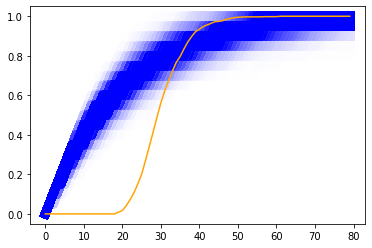

In [38]:
S, uec, PP = generate_empirical_data(20, 1000, 80, 0.8)
plt.plot(uec.T, color="b", lw=10, alpha=0.005)
plt.plot(PP, color="orange")

In [39]:
def P_n_f_of_kk(n, kk, f):
    
    PP = np.array([P_n_k_of_f(n, k, f) for k in kk])
    return PP
        
    
    

In [40]:
kk = np.round(np.logspace(0.5, np.log10(45), 10)) ##:

kk := array([ 3.,  4.,  6.,  8., 10., 14., 19., 25., 34., 45.])

---

In [41]:
%%time
PP_an = P_n_f_of_kk(20, kk, 0.8)

CPU times: user 30.1 s, sys: 19.1 ms, total: 30.1 s
Wall time: 30.2 s


(-3.95, 82.95, -0.05, 1.05)

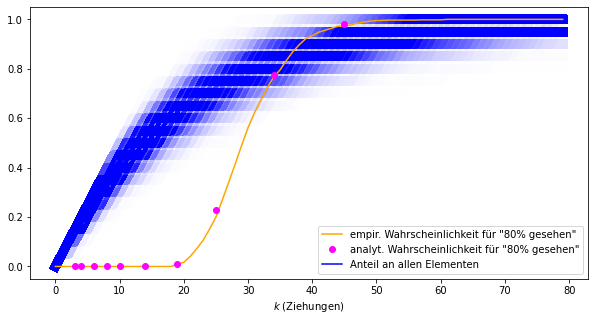

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(uec.T, color="b", lw=10, alpha=0.002)

plt.plot(PP, color="orange", label='empir. Wahrscheinlichkeit für "80% gesehen"')
plt.plot(kk, PP_an, "o", color="magenta", label='analyt. Wahrscheinlichkeit für "80% gesehen"')
axis = plt.axis()
plt.xlabel("$k$ (Ziehungen)")

# Legende komplettieren
plt.plot([-10, -20], "b-", label="Anteil an allen Elementen")

plt.legend()
plt.axis(axis)

In [43]:
%%time
P_n_k_of_f(20, 35, 0.8)

CPU times: user 1.13 s, sys: 0 ns, total: 1.13 s
Wall time: 1.13 s


0.814736009967580

**Fazit:** Numerisch-Empirische und analytische Ergebnisse stimmen ganz gut überein. Analytische Ergebnisse sind aber für größere Zahlen ziemlich aufwendig zu berechnen, weil die Formeln aus sehr vielen Termen bestehen (kombinatorische Explosion) und die entsprechenden Koeffizienten erst konstruiert werden müssen.